# Light GBM

- Author: Wen Xin
- Description: This file means that I use lightGBM as model.

In [387]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [388]:
train=pd.read_csv('train_transfer.csv')
test=pd.read_csv('test_transfer.csv')

In [389]:
features=['last_order',
 'active_days',
 'w7_total_orders',
 'log_total_orders',
 'order_sd',
 'lastgap',
 'avg_gap',
 'log_order_sd',
 'w6_total_orders',
 'min_gap',
 'w7_avg_couponworth',
 'log_lastgap',
 'log_min_gap',
 'order_nums',
 'w7_max_couponworth',
 'log_w7_max_couponworth',
 'dummy_log_lastgap',
 'w5_total_orders',
 'log_avg_gap',
 'max_gap',
 'send2update_time_min',
 'update2create_time_min',
 'kitchen_royalty',
 'dummy_log_avg_gap',
 'log_send2update_time_min',
 'dummy_log_min_gap',
 'app_version_b',
 'w6_max_couponworth',
 'dummy_log_max_gap',
 'w6_avg_couponworth',
 'log_w6_max_couponworth',
 'log_max_gap',
 'w4_total_orders',
 'w5_max_couponworth',
 'w5_avg_couponworth',
 'log_overall_time_min',
 'overall_time_min',
 'w3_total_orders',
 'comment_perc',
 'w4_max_couponworth',
 'w4_avg_couponworth',
 'overall_time_max',
 'w2_total_orders',
 'w3_max_couponworth',
 'w1_total_orders',
 'age',
 'accountLength',
 'w3_avg_couponworth',
 'first_order',
 'w2_max_couponworth',
 'update2create_time_mean',
 'w2_avg_couponworth',
 'w1_avg_couponworth',
 'sex',
 'w1_max_couponworth',
 'send2update_time_mean',
 'update2create_time_max',
 'last_coupon_fee',
 'dummy_log_send2update_time_mean',
 'log_send2update_time_mean',
 'overall_time_mean',
 'login_platform_b',
 'like_num',
 'staple_price',
 'intime_rate',
 'send2update_time_max',
 'log_overall_time_mean',
 'city_id',
 'last_send_type',
 'log_send2update_time_max',
 'label',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'cluster']

In [390]:
train=train[features]
test=test[features]

In [391]:
y_train=train['label']
X_train=train.drop(['label'],axis=1)
y_test=test['label']
X_test=test.drop(['label'],axis=1)

In [392]:
import lightgbm as lgb

In [393]:
categorical_features=[
 'last_send_type',
 'city_id',
 'sex',
 'age',
 'login_platform_b',
 'app_version_b',
 'age_na',
 'lastgap_na',
 'avg_gap_na',
 'min_gap_na',
 'max_gap_na',
 'overall_time_mean_na',
 'update2create_time_mean_na',
 'send2update_time_mean_na',
 'overall_time_min_na',
 'update2create_time_min_na',
 'send2update_time_min_na',
 'overall_time_max_na',
 'update2create_time_max_na',
 'send2update_time_max_na',
 'dummy_log_lastgap',
 'dummy_log_avg_gap',
 'dummy_log_min_gap',
 'dummy_log_max_gap',
 'dummy_log_update2create_time_mean',
 'dummy_log_send2update_time_mean',
 'dummy_log_update2create_time_min',
 'dummy_log_send2update_time_min',
 'dummy_log_update2create_time_max',
 'dummy_log_send2update_time_max',                               
 'staple_price',                         
 'like_num',                                                                                                                                                
 'dummy_like_num',                   
 'dummy_star',                        
 'dummy_has_kitchen_info',
 'cluster']

In [394]:
# if you want to re-use data, remember to set free_raw_data=False
lgb_train = lgb.Dataset(X_train, y_train,\
                        free_raw_data=False)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train,
                       free_raw_data=False)

In [395]:
params = {
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth':-1,
    'learning_rate': 0.05,
    'n_estimators':600,
    'objective': 'binary',
    'silent':False,
    'verbose': 0
}

In [396]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train)

[1]	training's binary_logloss: 0.587173
[2]	training's binary_logloss: 0.570298
[3]	training's binary_logloss: 0.555301
[4]	training's binary_logloss: 0.541822
[5]	training's binary_logloss: 0.529688
[6]	training's binary_logloss: 0.518708
[7]	training's binary_logloss: 0.508687
[8]	training's binary_logloss: 0.49957
[9]	training's binary_logloss: 0.491185
[10]	training's binary_logloss: 0.483536
[11]	training's binary_logloss: 0.476485
[12]	training's binary_logloss: 0.470021
[13]	training's binary_logloss: 0.464056
[14]	training's binary_logloss: 0.45858
[15]	training's binary_logloss: 0.45351
[16]	training's binary_logloss: 0.448822
[17]	training's binary_logloss: 0.444483
[18]	training's binary_logloss: 0.440423
[19]	training's binary_logloss: 0.436687
[20]	training's binary_logloss: 0.433207
[21]	training's binary_logloss: 0.429995
[22]	training's binary_logloss: 0.426996
[23]	training's binary_logloss: 0.424224
[24]	training's binary_logloss: 0.421638
[25]	training's binary_loglo

In [397]:
train_predict=gbm.predict(X_train)
test_predict=gbm.predict(X_test)

In [398]:
from sklearn import metrics

In [399]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_test,test_predict)

Text(0.5,1,'ROC curve')

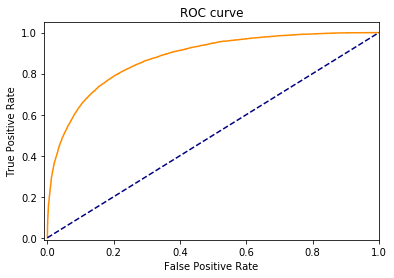

In [400]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [401]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,train_predict)

0.9054103256343892

In [402]:
roc_auc_score(y_test,test_predict)

0.8770016477854039

In [403]:
gbm_classifier=lgb.LGBMClassifier(learning_rate=0.07)

In [404]:
gbm_classifier.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.07, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [405]:
train_predict_1=gbm_classifier.predict(X_train)
test_predict_1=gbm_classifier.predict(X_test)

In [406]:
print(metrics.classification_report(y_train, train_predict_1))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88    108250
         1.0       0.77      0.61      0.68     45234

   micro avg       0.83      0.83      0.83    153484
   macro avg       0.81      0.77      0.78    153484
weighted avg       0.83      0.83      0.83    153484



In [407]:
print(metrics.classification_report(y_test, test_predict_1))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     27008
         1.0       0.75      0.61      0.68     11363

   micro avg       0.83      0.83      0.83     38371
   macro avg       0.80      0.76      0.78     38371
weighted avg       0.82      0.83      0.82     38371



In [408]:
train_predict_1_=gbm_classifier.predict_proba(X_train)
test_predict_1_=gbm_classifier.predict_proba(X_test)

In [409]:
roc_auc_score(y_train,train_predict_1_.T[1])

0.8840888284181174

In [410]:
roc_auc_score(y_test,test_predict_1_.T[1])

0.8772566105230328

### 去除outlier

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

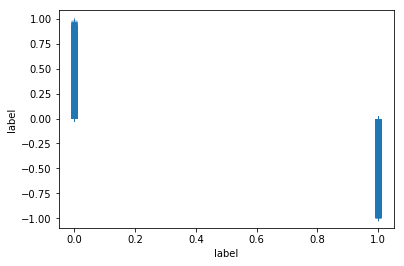

In [412]:
# resident plot
sns.scatterplot(x=y_train, y=(train_predict_1_.T[1]-y_train),alpha=0.2,marker="+")

In [413]:
X_train['label']=y_train

In [414]:
X_train['residual']=y_train-train_predict_1_.T[1]

In [415]:
X_train_1=X_train[X_train['label']==1]

In [416]:
X_train_1['residual'].describe()

count    45234.000000
mean         0.411707
std          0.286631
min          0.006417
25%          0.152203
50%          0.373989
75%          0.661091
max          0.994164
Name: residual, dtype: float64

In [417]:
len(X_train_1[(X_train_1['residual']>(1-3*0.286607)) \
              & (X_train_1['residual']<(1+3*0.286607))])

34725

In [418]:
X_train_0=X_train[X_train['label']==0]

In [419]:
X_train_0['residual'].describe()

count    108250.000000
mean         -0.172057
std           0.186016
min          -0.982729
25%          -0.238195
50%          -0.101305
75%          -0.038574
max          -0.005256
Name: residual, dtype: float64

In [424]:
len(X_train_0[(X_train_0['residual']>(0-4*0.184737)) \
              & (X_train_0['residual']<(0+4*0.184737))])

106026

In [425]:
train_1=X_train_1
# train_1=X_train_1[(X_train_1['residual']>(1-3*0.286607)) \
#               & (X_train_1['residual']<(1+3*0.286607))]
train_0=X_train_0[(X_train_0['residual']>(0-4*0.184737)) \
              & (X_train_0['residual']<(0+4*0.184737))]

In [426]:
X_trian_all=pd.concat([train_0,train_1], sort=False)

In [427]:
y_train=X_trian_all['label']
X_train=X_trian_all.drop(['residual','label'],axis=1)

In [436]:
gbm_classifier=lgb.LGBMClassifier(num_leaves=20,learning_rate=0.1)

In [437]:
gbm_classifier.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [438]:
train_predict_2=gbm_classifier.predict(X_train)
test_predict_2=gbm_classifier.predict(X_test)

In [439]:
print(metrics.classification_report(y_train, train_predict_2))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89    106026
         1.0       0.82      0.61      0.70     45234

   micro avg       0.84      0.84      0.84    151260
   macro avg       0.83      0.78      0.80    151260
weighted avg       0.84      0.84      0.84    151260



In [440]:
print(metrics.classification_report(y_test, test_predict_2))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     27008
         1.0       0.75      0.61      0.67     11363

   micro avg       0.83      0.83      0.83     38371
   macro avg       0.80      0.76      0.78     38371
weighted avg       0.82      0.83      0.82     38371



In [441]:
train_predict_2_=gbm_classifier.predict_proba(X_train)
test_predict_2_=gbm_classifier.predict_proba(X_test)

In [442]:
roc_auc_score(y_train,train_predict_2_.T[1])

0.8956890310764684

In [443]:
roc_auc_score(y_test,test_predict_2_.T[1])

0.8771816557923926

### Oversample

In [328]:
from sklearn.utils import resample

In [147]:
X_train['label']=y_train
bag = X_train[X_train['label']==1]
boot = resample(bag, replace=True, n_samples=int(len(X_train[X_train['label']==0])*0.2), random_state=1)
X_train=pd.concat([boot,X_train],sort=False)

In [148]:
y_train=X_train['label']
X_train=X_train.drop(['label'],axis=1)

In [149]:
gbm_classifier.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [150]:
train_predict_3=gbm_classifier.predict(X_train)
test_predict_3=gbm_classifier.predict(X_test)

In [151]:
print(metrics.classification_report(y_train, train_predict_3))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88    101950
         1.0       0.88      0.70      0.78     65624

   micro avg       0.84      0.84      0.84    167574
   macro avg       0.85      0.82      0.83    167574
weighted avg       0.85      0.84      0.84    167574



In [152]:
print(metrics.classification_report(y_test, test_predict_3))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     27008
         1.0       0.70      0.69      0.69     11363

   micro avg       0.82      0.82      0.82     38371
   macro avg       0.78      0.78      0.78     38371
weighted avg       0.82      0.82      0.82     38371



In [329]:
train_predict_3_=gbm_classifier.predict_proba(X_train)
test_predict_3_=gbm_classifier.predict_proba(X_test)

In [330]:
roc_auc_score(y_train,train_predict_3_.T[1])

0.9085824414858542

In [331]:
roc_auc_score(y_test,test_predict_3_.T[1])

0.8764028310763128

In [444]:
pd.DataFrame(train_predict_2_.T[1]).to_csv('lightgbm_train.csv',index=False)

In [445]:
pd.DataFrame(test_predict_2_.T[1]).to_csv('lightgbm_test.csv',index=False)

### get feature importance

In [65]:
importances=pd.Series(gbm_classifier.feature_importances_)

In [66]:
columns=pd.Series(list(X_train.columns))

In [71]:
pd.concat([columns,importances],axis=1).sort_values(by=1,ascending=False).head(30)

,0,1
77,log_last_order,216
32,app_version_b,191
12,w7_total_orders,149
1,active_days,122
31,login_platform_b,95
30,age,83
75,log_w7_total_orders,80
15,accountLength,78
25,last_coupon_fee,77
14,last_order,74
